In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Завантаження даних

In [142]:
df = pd.read_excel('data\\data_lab1.xlsx', sheet_name='2,18', index_col=0)

df.dropna(inplace=True)

df

,t36,t35,t34,t33,t32
Диурез,,,,,
1,50,50,60,80,130
2,45,45,60,85,150
3,45,45,60,80,150
4,50,50,55,90,200
5,50,50,55,85,110
6,50,40,60,85,120
7,45,50,55,80,120
8,45,50,55,90,130
9,50,55,60,85,150


In [143]:
X = df.copy()
#вибір ознак
X = X[['t36','t35','t34','t33','t32']]
#стандартизація даних
X_st = (X - X.mean()) / X.std(ddof=1)
X

,t36,t35,t34,t33,t32
Диурез,,,,,
1,50,50,60,80,130
2,45,45,60,85,150
3,45,45,60,80,150
4,50,50,55,90,200
5,50,50,55,85,110
6,50,40,60,85,120
7,45,50,55,80,120
8,45,50,55,90,130
9,50,55,60,85,150


## кластеризація  даних  методом k-середніх  на  задану  користувачем  кількість кластерів

In [144]:
kmeans = KMeans(n_clusters=2, init="random", n_init=10)
kmeans.fit(X)
df['y_kmeans'] = kmeans.labels_

## візуалізація  даних  до  та  після  кластеризації  в  просторі  двох  вказаних користувачем ознак; після кластеризації точки, що відповідають об’єктам різних кластерів, мають позначатися різним кольором

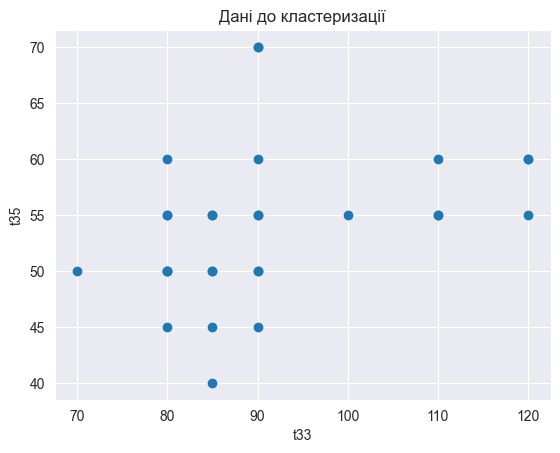

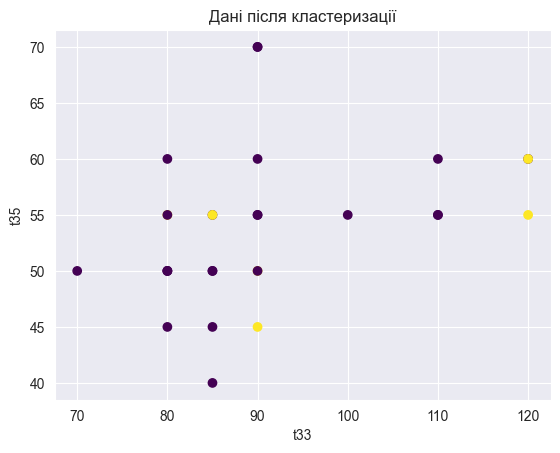

In [145]:
# Візуалізація даних до кластеризації
plt.scatter(df["t33"],df["t35"], label='До кластеризації')
plt.xlabel('t33')
plt.ylabel('t35')
plt.title('Дані до кластеризації')
plt.show()

# Візуалізація даних після кластеризації
plt.scatter(df["t33"],df["t35"], c=df['y_kmeans'],cmap='viridis')
plt.xlabel('t33')
plt.ylabel('t35')
plt.title('Дані після кластеризації')
plt.show()

C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

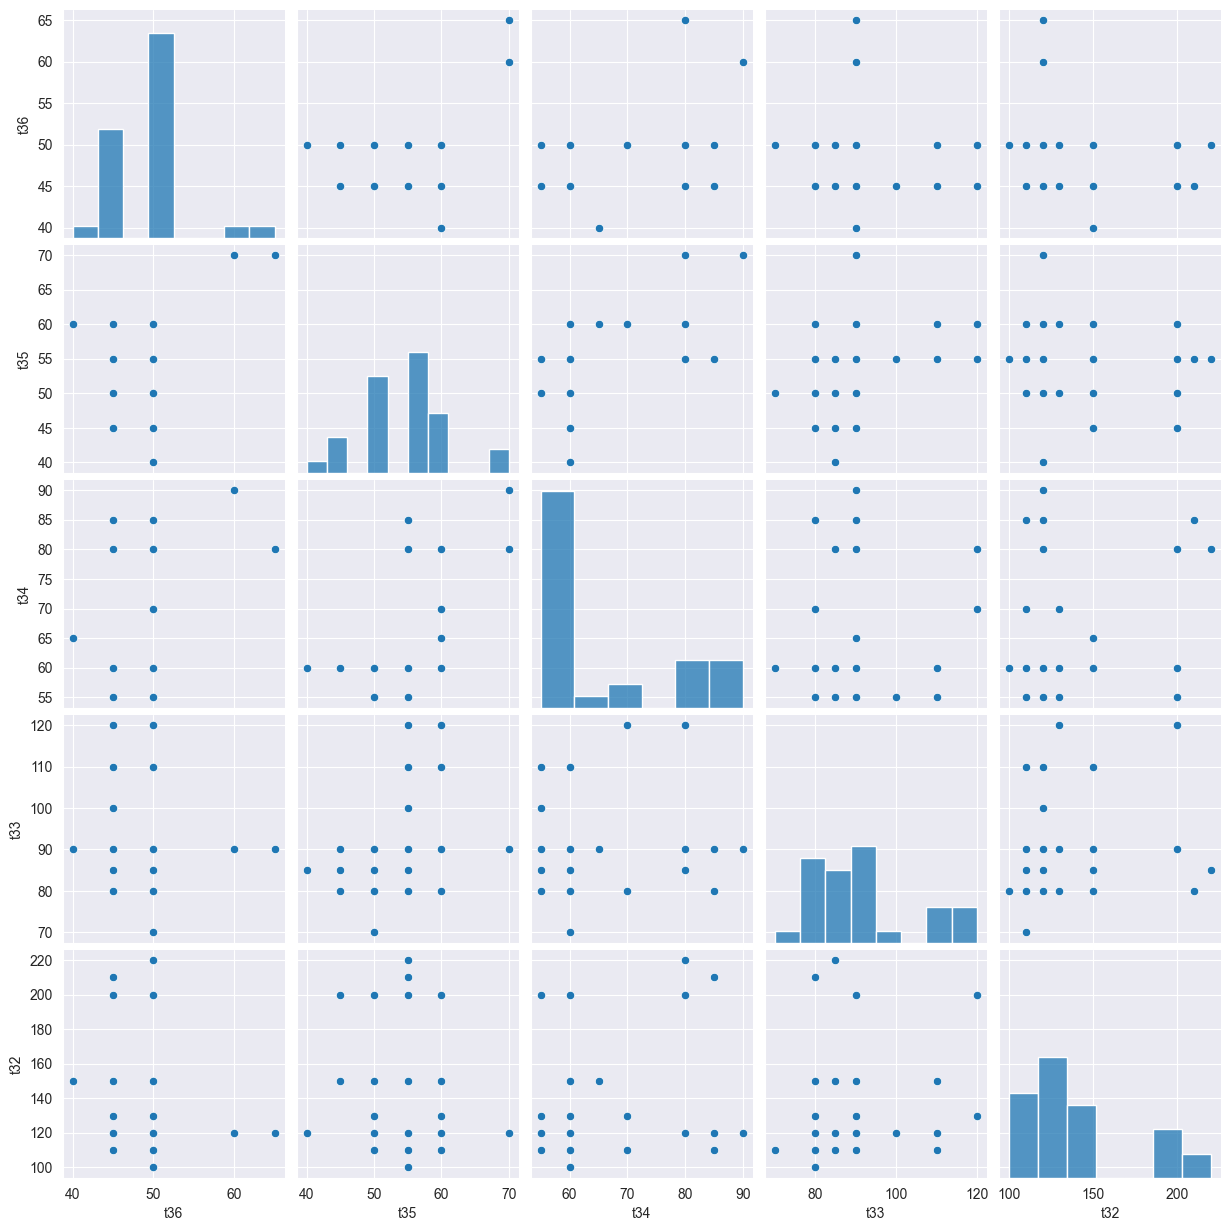

In [146]:
sns.pairplot(X)

## Візуалізація даних, в яких більше двох ознак, до та після кластеризації на графіку паралельних  координат;  після  кластеризації  лінії,  що відповідають  об’єктам різних кластерів, мають позначатися різним кольором; 

In [147]:
df["y_kmeans"] = 1
df.head()

,t36,t35,t34,t33,t32,y_kmeans
Диурез,,,,,,
1,50,50,60,80,130,1
2,45,45,60,85,150,1
3,45,45,60,80,150,1
4,50,50,55,90,200,1
5,50,50,55,85,110,1


<Axes: >

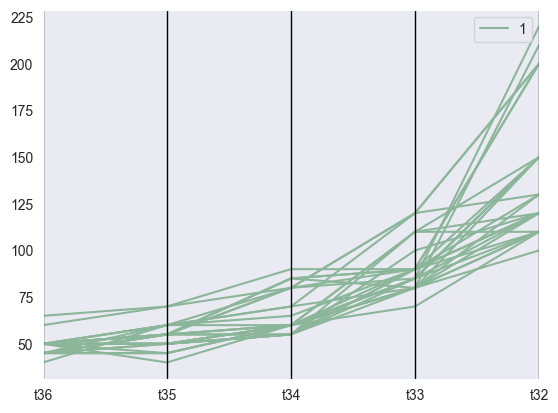

In [148]:
# До кластеризації 
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=X.columns)

<Axes: >

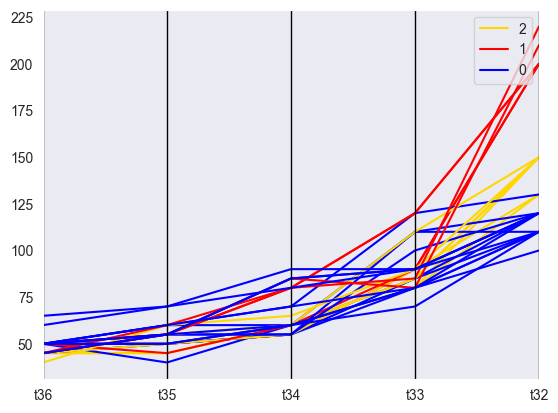

In [149]:
# Після кластеризації 
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
df['y_kmeans'] = kmeans.labels_

colors = ('gold', 'red', 'blue', 'green','hotpink')
pd.plotting.parallel_coordinates(df, 'y_kmeans', cols=X.columns, color=colors)

In [150]:
# sns.pairplot(df, hue='y_kmeans', vars=X.columns, palette=dict(zip(df['y_kmeans'].unique(), colors[:df['y_kmeans'].nunique()])))

## Оцінювання  оптимальної  кількості  кластерів  на  основі  одного  з  індексів  якості кластеризації;  результати  оцінювання  подати  у  табличному  та  графічному вигляді; 

C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\misha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

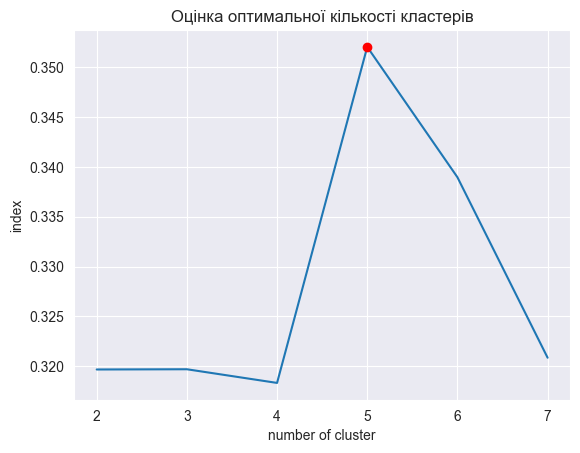

In [151]:
indices = []
k_range = range(2, 8)
for k in k_range:
    labels = KMeans(n_clusters=k).fit_predict(X_st)
    indices.append(silhouette_score(X_st,labels))
plt.plot(k_range,indices)
arg = np.argmax(indices)
plt.plot(k_range[arg], indices[arg], marker='o', color='red')
plt.xlabel('number of cluster')
plt.ylabel('index')
plt.title('Оцінка оптимальної кількості кластерів')

optimal_num_clusters = k_range[np.argmax(indices)]


## Розрахунок середнього арифметичного та середньоквадратичного відхилення для кожного виділеного кластеру. 

In [152]:
cluster_stats = df.groupby('y_kmeans').agg({'t36': ['mean', 'std'],
                                             't35': ['mean', 'std'],
                                             't34': ['mean', 'std'],
                                             't33': ['mean', 'std'],
                                             't32': ['mean', 'std']})

print(cluster_stats)

                t36                  t35                  t34             \
               mean       std       mean       std       mean        std   
y_kmeans                                                                   
0         50.333333  5.498918  55.666667  7.761320  66.666667  12.488090   
1         48.333333  2.581989  53.333333  5.163978  73.333333  12.516656   
2         46.875000  3.720119  51.250000  5.175492  60.000000   2.672612   

                t33                    t32            
               mean        std        mean       std  
y_kmeans                                              
0         90.666667  13.740798  115.333333  7.432234  
1         97.500000  17.818530  205.000000  8.366600  
2         88.125000   9.613049  145.000000  9.258201  
